## IRIS FLOWER CLASSIFICATION

In [1]:
#Importing necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
iris_dataset = pd.read_csv('iris.csv')

In [3]:
#Viewing first five rows
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Renaming columns and dropping Id column
iris_dataset.drop('Id',axis=1,inplace=True)
iris_dataset.rename(columns ={'SepalLengthCm':'Sepal_Length','SepalWidthCm':'Sepal_Width','PetalLengthCm':'Petal_Length','PetalWidthCm':'Petal_Width'},inplace =True)

In [5]:
# dataset info
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#checking null values
iris_dataset.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

In [7]:
#Checking duplicates
iris_dataset[iris_dataset.duplicated()]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
#Dropping duplicates
iris_dataset.drop_duplicates(inplace=True)

In [17]:
#checking duplicates
iris_dataset.duplicated().sum()

0

In [19]:
#Correlation
iris_dataset.select_dtypes(include = [float,int]).corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.109321,0.871305,0.817058
Sepal_Width,-0.109321,1.000000,-0.421057,-0.356376
Petal_Length,0.871305,-0.421057,1.000000,0.961883
Petal_Width,0.817058,-0.356376,0.961883,1.000000


### Exploratory Data Analysis

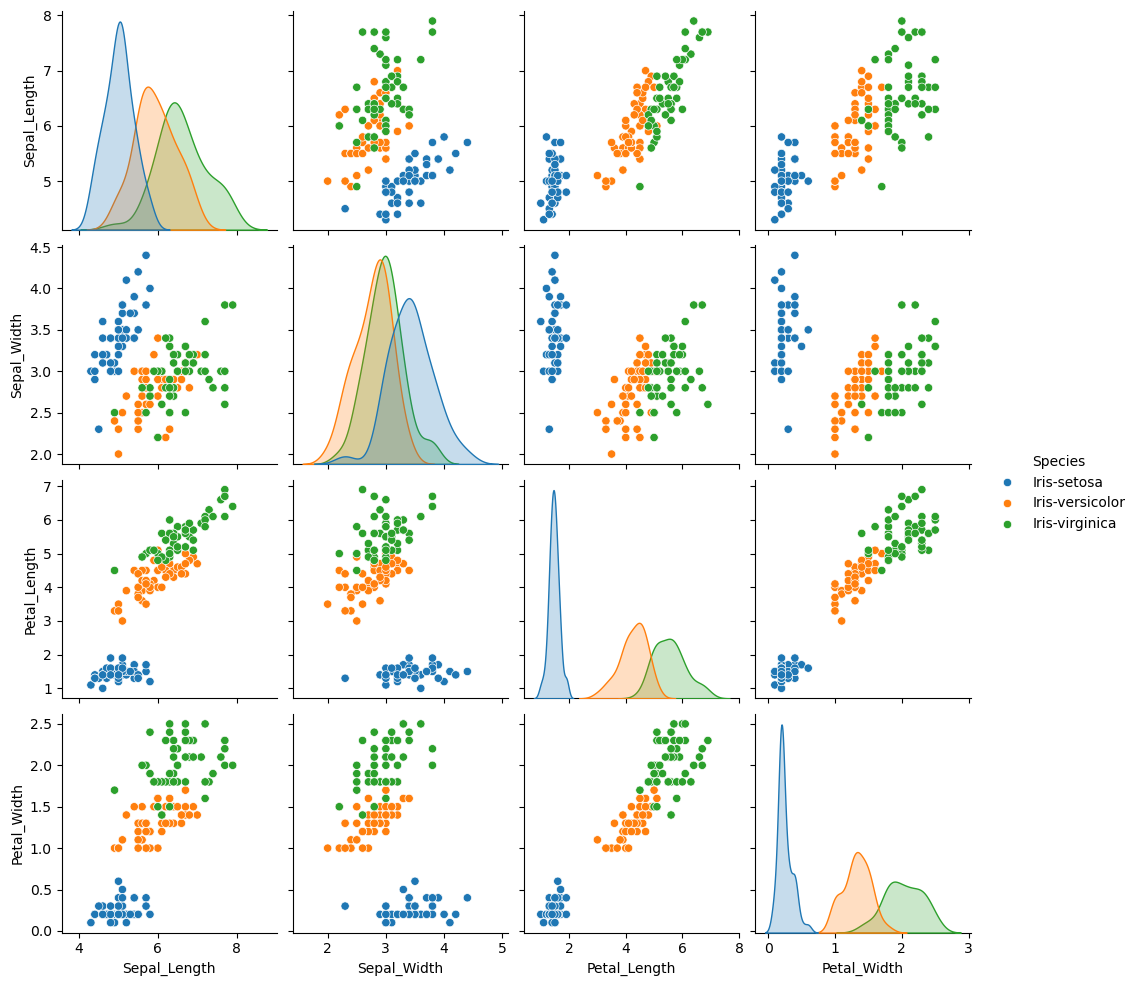

In [22]:
#Visualization of the dataset
sns.pairplot(iris_dataset,hue = 'Species')

<Axes: ylabel='count'>

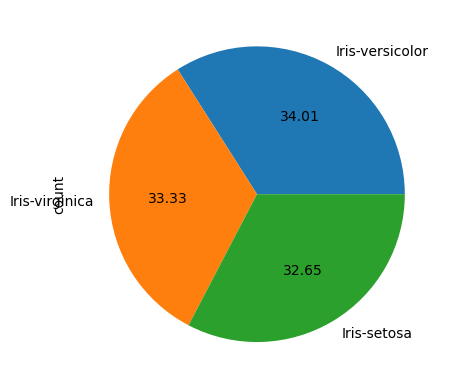

In [23]:
#Using Pie chart
iris_dataset['Species'].value_counts().plot(kind='pie',autopct = '%.2f')

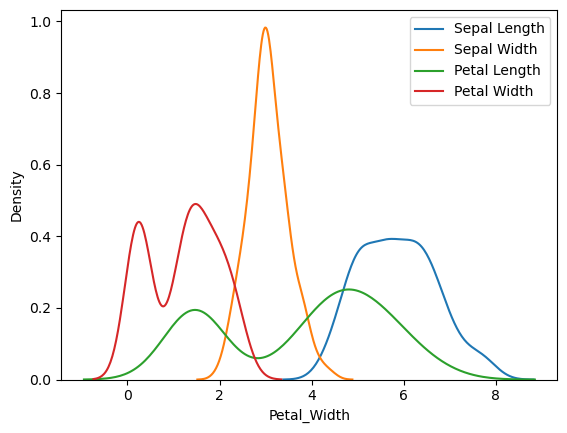

In [28]:
#Distribution plot
sns.distplot(iris_dataset['Sepal_Length'],hist=False,label='Sepal Length')
sns.distplot(iris_dataset['Sepal_Width'],hist=False,label = 'Sepal Width')
sns.distplot(iris_dataset['Petal_Length'],hist=False,label = 'Petal Length')
sns.distplot(iris_dataset['Petal_Width'],hist=False,label = 'Petal Width')
plt.legend()
plt.show()

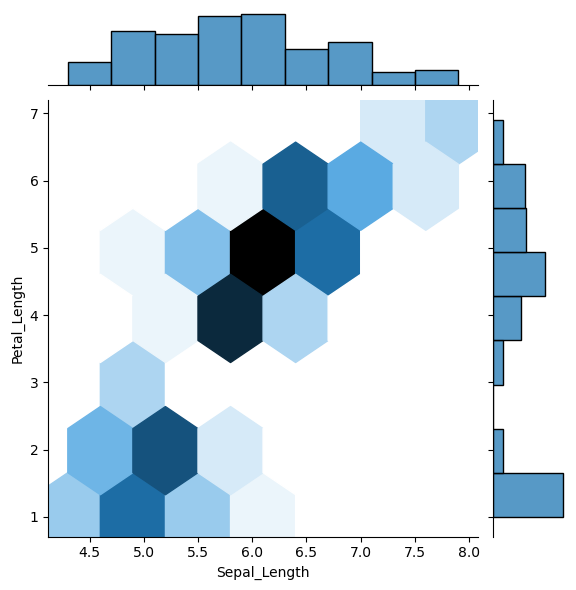

In [34]:
#Joint Plot
sns.jointplot(x=iris_dataset['Sepal_Length'],y=iris_dataset['Petal_Length'],data = iris_dataset,kind = 'hex')

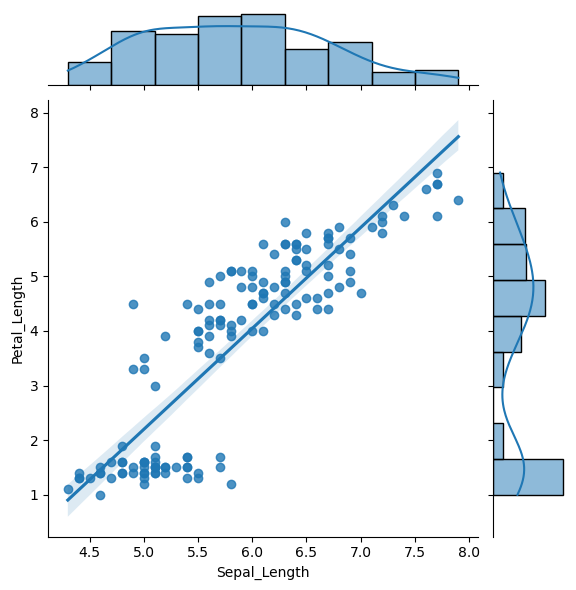

In [36]:
sns.jointplot(x=iris_dataset['Sepal_Length'],y=iris_dataset['Petal_Length'],data = iris_dataset,kind = 'reg')

<Axes: >

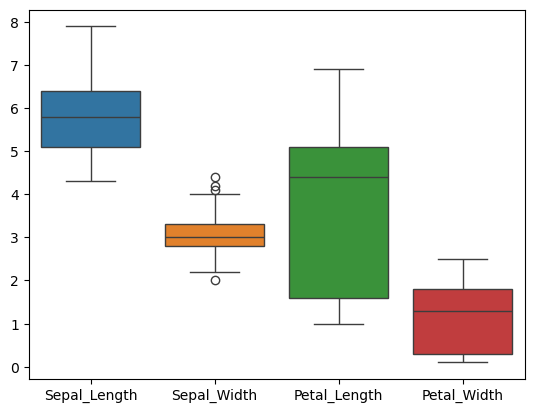

In [38]:
#Box Plot
sns.boxplot(data=iris_dataset)

array([[<Axes: title={'center': 'Petal_Length'}, xlabel='[Species]'>,
        <Axes: title={'center': 'Petal_Width'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'Sepal_Length'}, xlabel='[Species]'>,
        <Axes: title={'center': 'Sepal_Width'}, xlabel='[Species]'>]],
      dtype=object)

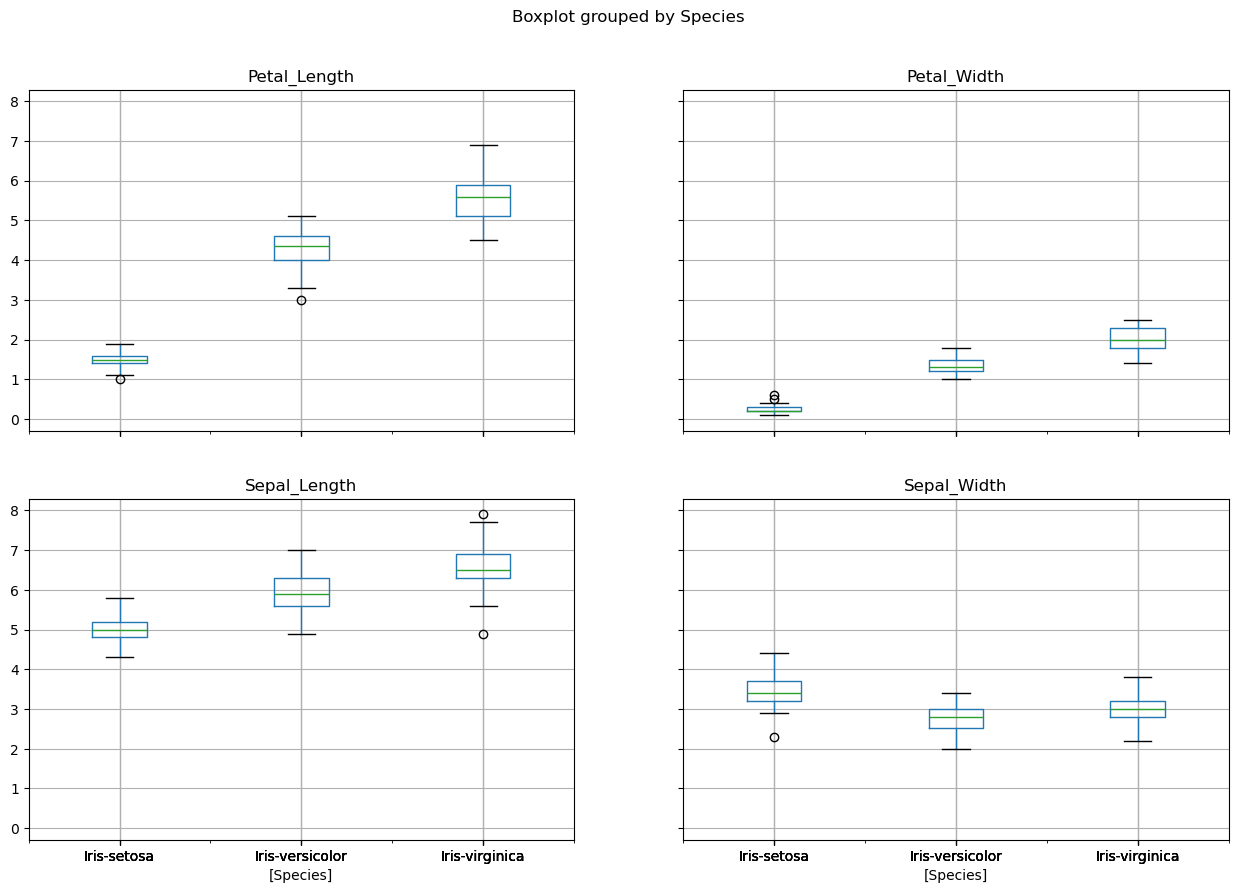

In [40]:
iris_dataset.boxplot(by = 'Species', figsize = (15,10))

### Feature Scaling

In [71]:
features = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
       
x = iris_dataset[features].values
y = iris_dataset['Species'].values

In [73]:
#Splitting the data into train and test dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Label Encoder

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [78]:
y = le.transform(y)

### Standard Scaler

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [83]:
x_train_scale = scaler.transform(x_train)
x_test_scale  = scaler.transform(x_test)

### Model Training

#### Logistic Regression

In [86]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [88]:
model.fit(x_train_scale,y_train)

LogisticRegression()

In [92]:
model_pred = model.predict(x_test_scale)
accuracy_score(model_pred,y_test)

1.0

#### Support Vector Machine

In [99]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_scale,y_train)


SVC()

In [101]:
svc_pred = svc.predict(x_test_scale)

In [107]:
accuracy_score(svc_pred,y_test)

1.0

#### K-Nearest Neighbors

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train_scale,y_train)

KNeighborsClassifier(n_neighbors=3)

In [114]:
knn_pred = knn.predict(x_test_scale)

In [116]:
accuracy_score(knn_pred,y_test)

1.0

### Model Evaluation

#### Confusion Matrix

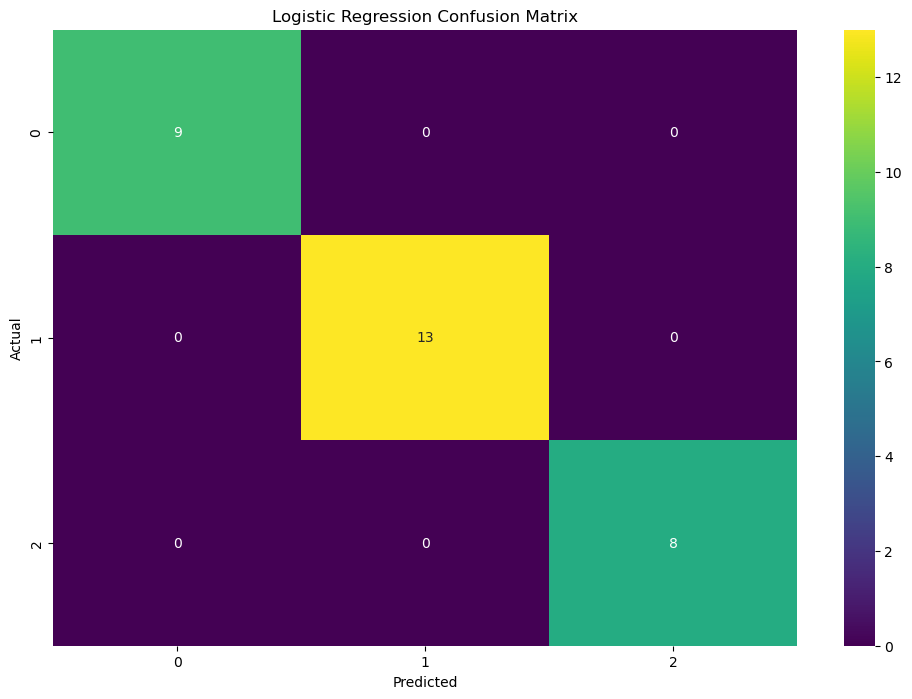

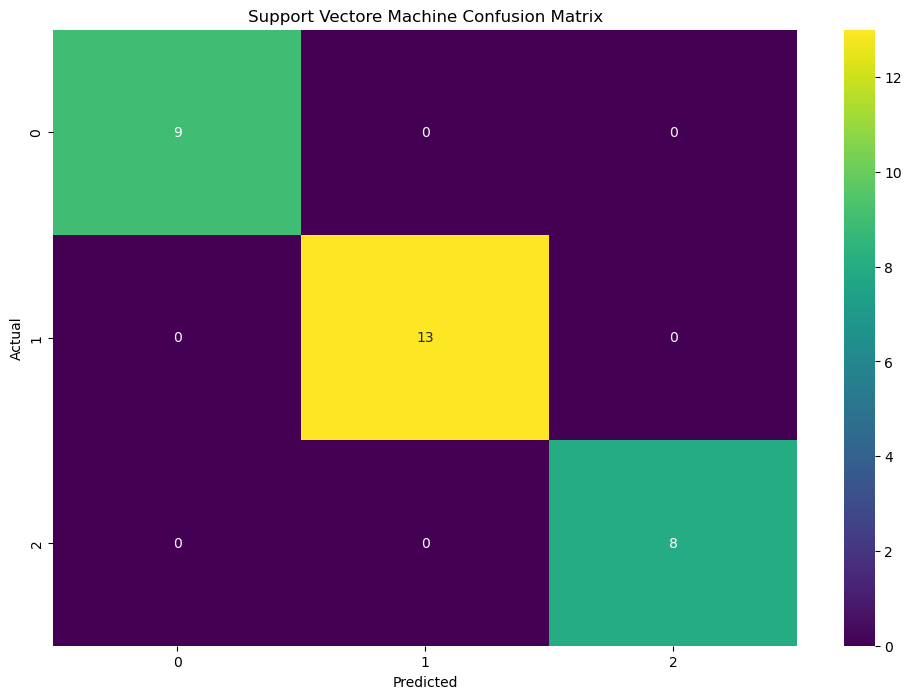

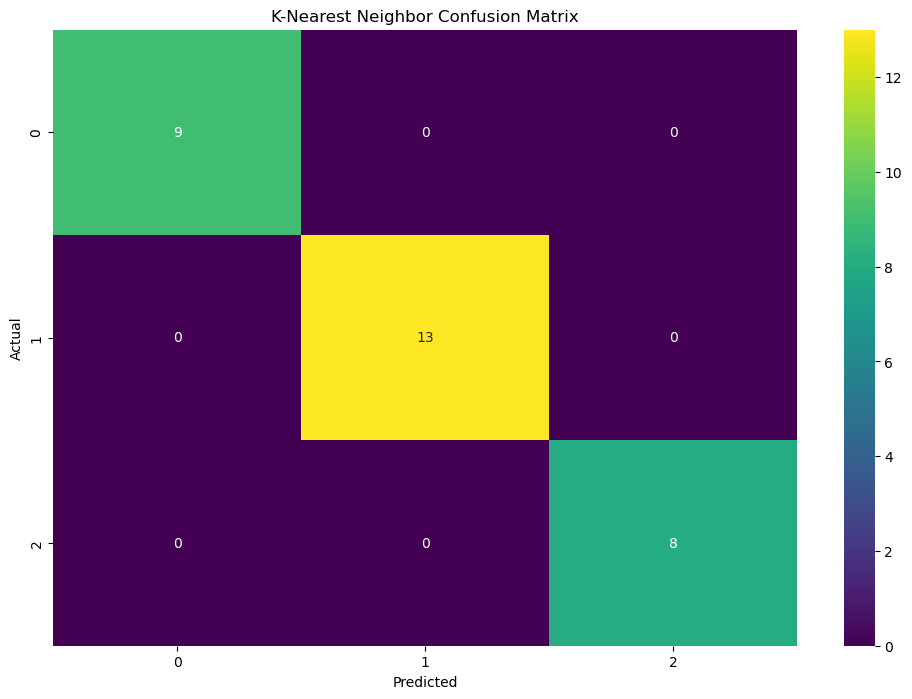

In [122]:
log_reg_cm = confusion_matrix(y_test,model_pred)
svm_cm     = confusion_matrix(y_test,svc_pred)
knn_cm     = confusion_matrix(y_test,knn_pred)

def plot_confusion_matrix(cm,title):
    plt.figure(figsize = (12,8))
    sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'viridis')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(log_reg_cm,'Logistic Regression Confusion Matrix')
plot_confusion_matrix(svm_cm,'Support Vectore Machine Confusion Matrix')
plot_confusion_matrix(knn_cm,'K-Nearest Neighbor Confusion Matrix')